
## Requirements:  
`Create a geographic data visualization that shows world population by country`  
Downloaded world geo.json and using population data, join population to geojason, then fill the  
country polygon with a color depending on population, giving a Choropleth visualisation of country by population    
[Choropleth Map](https://geopandas.org/en/stable/docs/user_guide/mapping.html)  
  
imports:

In [2]:
%matplotlib ipympl
import pandas
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
# create a dataframe with the country/population 
population_url = r'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
population_query = pandas.read_html(population_url)
population_df = population_query[0]

# create a geoDataFrame containing the geometry of the world
geoDataFrame = gpd.read_file("C:\\Users\\Trevor\\Documents\\GitHub\\PaletteCohort7\\Trevor\\data\\world_map.geo.json")

Show the population Data Frame for reference

In [16]:
population_df

,Unnamed: 0,Location,Population,% of world,Date,Source (official or from the United Nations),Notes
0,NaN,World,8119000000,100%,1 Jul 2024,UN projection[1][3],NaN
1,[b],China,1409670000,NaN,31 Dec 2023,Official estimate[5],[c]
2,[b],India,1404910000,NaN,1 Jul 2024,Official projection[6],[d]
3,3,United States,335893238,NaN,1 Jan 2024,Official estimate[7],[e]
4,4,Indonesia,281603800,NaN,1 Jul 2024,National annual projection[8],NaN
...,...,...,...,...,...,...,...
235,NaN,Niue (New Zealand),1681,NaN,11 Nov 2022,2022 Census [233],NaN
236,NaN,Tokelau (New Zealand),1647,NaN,1 Jan 2019,2019 Census [234],NaN
237,195,Vatican City,764,NaN,26 Jun 2023,Official figure[235],[af]
238,NaN,Cocos (Keeling) Islands (Australia),593,NaN,30 Jun 2020,2021 Census[236],NaN


Data prep. Clip excess data and rename the Location to match the GeoDatFrame "sovereignt" column so we can merge them

In [4]:
# remove totals row as this throws everything off and remove everything after 2019
clipped = population_df.iloc[1:, 1:3]
# Location = United States socereignt = 'United States of America'
clipped['Location'] = clipped['Location'].str.replace("United States", "United States of America")
clipped['sovereignt'] = clipped['Location']
merged_data_frame = pandas.merge(geoDataFrame, clipped, on='sovereignt')


Notice Location and Population added to the very end of the DataFrame  
**NOTE** `inplace=True` to capture the output

In [5]:
# column= maps color by the column, giving different fill colors to the geometry per value
# legend=True shows the legend of the color values
title_text = "Country By Population (Billion People)"
merged_data_frame.sort_values("Population", ascending=False, inplace=True)


In [ ]:
merged_data_frame

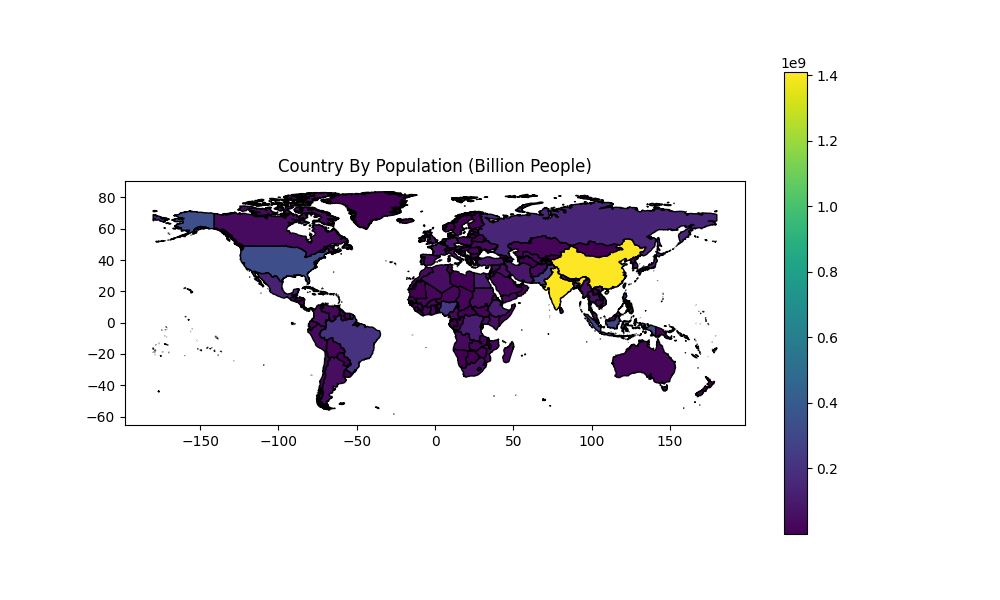

In [6]:

axis = merged_data_frame.plot(column='Population', 
                              legend=True, 
                              #title= title_text,
                              aspect=1, 
                              edgecolor='black', 
                              figsize=(10, 6)
                              ).set_title(title_text)

plt.show()